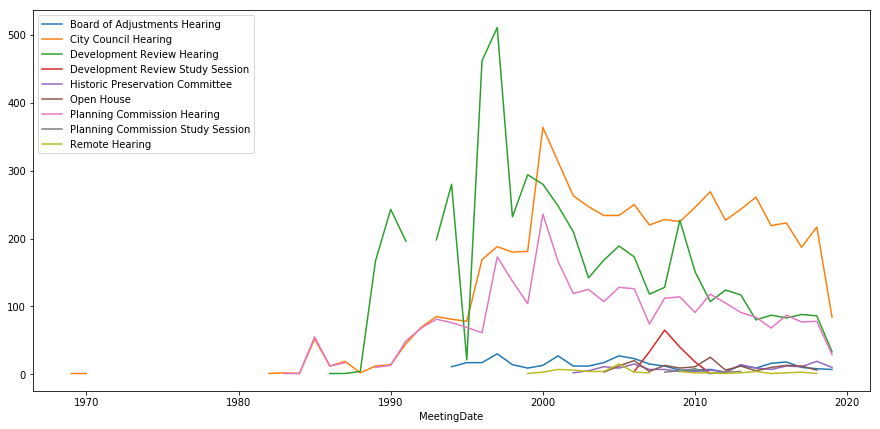

In [58]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

Case_Query = '''
select *
from [dbo].[pds_CaseMeetings]
where [MeetingType] <> '' and [MeetingType] <> 'Other' and year([MeetingDate]) > '1951' 
  '''
# save the sql query to a pandas dataframe
Case_Data = pd.read_sql(Case_Query, connection)
connection.close()

Case_Data['MeetingDate'] = pd.to_datetime(Case_Data['MeetingDate']) #converte MeetingDate to datetime format

Case_Data['MeetingDate'] = Case_Data['MeetingDate'].dt.year #converte MeetingDate to year

fig, ax = plt.subplots(figsize=(15,7))
Case_Data.groupby(['MeetingDate','MeetingType']).count()['meeting_id'].unstack().plot(ax=ax)
plt.legend(loc='upper left')

In [60]:
Case_Data.head(10)

,meeting_id,case_id,CaseNumber,MeetingType,MeetingDate,Result,Vote
0,7571,20987,4-UP-2001,City Council Hearing,2001,APPROVED,7-0
1,7573,20988,5-UP-2001,Planning Commission Hearing,2001,CONTINUED,
2,7574,20988,5-UP-2001,City Council Hearing,2001,APPROVED,7-0
3,7575,20990,3-ZN-2001,Planning Commission Hearing,2001,CONTINUED,6-0
4,7576,20990,3-ZN-2001,City Council Hearing,2001,APPROVED,7-0
5,7578,20911,77-SD-1984,Remote Hearing,2001,APPROVED,
6,7579,20994,12-DR-2001,Development Review Hearing,2001,CONTINUED,
7,7580,20996,13-DR-2001,Development Review Hearing,2001,APPROVED,6-0
8,7581,20995,6-UP-2001,Planning Commission Hearing,2001,CONTINUED,
9,7582,20995,6-UP-2001,City Council Hearing,2001,APPROVED,4-3
